Energi Kinetik T=


Energi Potensial V =


Lagrangian L=


eqX = 


eqTheta = 


eqX = 


eqTheta = 


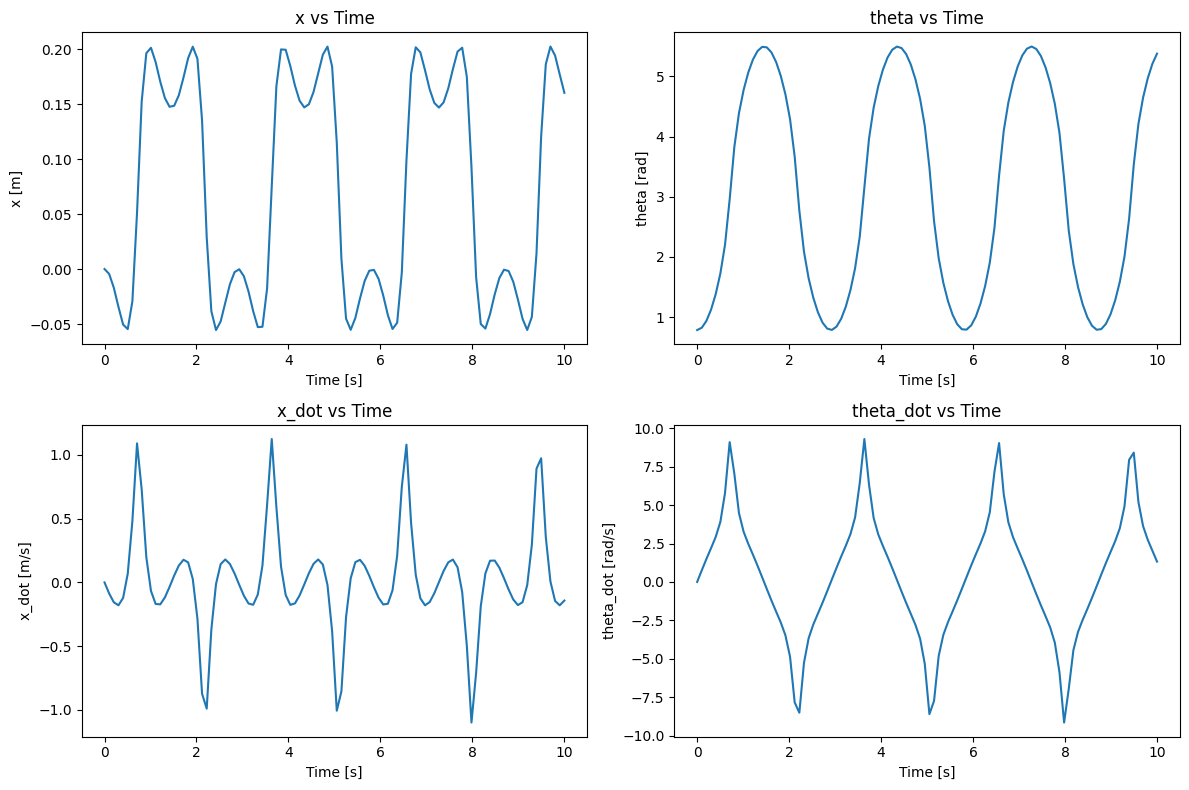

In [18]:
import numpy as np
import sympy as sp


# Define the symbols
from sympy import *
from sympy.physics.mechanics import *

init_vprinting()


# Define the variables
m, M, a, g, t = symbols("m M a g t")

theta = Function("theta")(t)
x = Function("x")(t)

# definisikan time derivative
theta_dot = diff(theta, t)
x_dot = diff(x, t)

# Kinetic energy (T) and potential energy (V) equations
T = 0.5 * M * x_dot**2 + 0.5 * m * (
    (x_dot + a * theta_dot * cos(theta)) ** 2 + (a * theta_dot * sin(theta)) ** 2
)
V = -m * g * a * cos(theta)

print("Energi Kinetik T=")
display(T)
print("Energi Potensial V =")
display(V)

# Lagrangian equation
L = T - V

print("Lagrangian L=")
display(L)


# Euler-Lagrange equation
# koordinat umum ada x dan theta
thetaDot = theta.diff(t)
thetaDdot = thetaDot.diff(t)

xDot = x.diff(t)
xDdot = xDot.diff(t)

eqX = diff(diff(L, xDot), t) - diff(L, x)  # euler lagrange untuk koordinat x
eqTheta = diff(diff(L, thetaDot), t) - diff(
    L, theta
)  # euler lagrange untuk koordinata theta

print("eqX = ")
display(eqX)
print("eqTheta = ")
display(eqTheta)

# Simplify the Euler-Lagrange equations
eqX = simplify(eqX)
eqTheta = simplify(eqTheta)

print("eqX = ")
display(eqX)
print("eqTheta = ")
display(eqTheta)

from scipy.integrate import odeint


# Define the system of ODEs
def system(y, t, m, M, a, g):
    x, theta, x_dot, theta_dot = y
    x_ddot = (m * a * theta_dot**2 * sin(theta) - m * g * sin(theta) * cos(theta)) / (
        M + m * (1 - cos(theta) ** 2)
    )
    theta_ddot = (
        g * sin(theta)
        - a * theta_dot**2 * sin(theta) * cos(theta)
        - x_ddot * cos(theta)
    ) / a
    return x_dot, theta_dot, x_ddot, theta_ddot


# Initial conditions
x0 = 0
theta0 = np.pi / 4
x_dot0 = 0
theta_dot0 = 0
y0 = [x0, theta0, x_dot0, theta_dot0]

# Time array
t = np.linspace(0, 10, 100)

# Parameters
m_val = 1
M_val = 5
a_val = 1
g_val = 9.81

# Solve the system of ODEs
sol = odeint(system, y0, t, args=(m_val, M_val, a_val, g_val))

# Extract the solutions
x_sol = sol[:, 0]
theta_sol = sol[:, 1]
x_dot_sol = sol[:, 2]
theta_dot_sol = sol[:, 3]

# Plot the solutions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(t, x_sol)
plt.xlabel("Time [s]")
plt.ylabel("x [m]")
plt.title("x vs Time")

plt.subplot(222)
plt.plot(t, theta_sol)
plt.xlabel("Time [s]")
plt.ylabel("theta [rad]")
plt.title("theta vs Time")

plt.subplot(223)
plt.plot(t, x_dot_sol)
plt.xlabel("Time [s]")
plt.ylabel("x_dot [m/s]")
plt.title("x_dot vs Time")

plt.subplot(224)
plt.plot(t, theta_dot_sol)
plt.xlabel("Time [s]")
plt.ylabel("theta_dot [rad/s]")
plt.title("theta_dot vs Time")

plt.tight_layout()
plt.show()